In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mv_n
from sklearn.datasets import make_spd_matrix as mspd
import random

In [12]:
print(np.random.randn(10)[1])

0.18040828814368268


# Q2

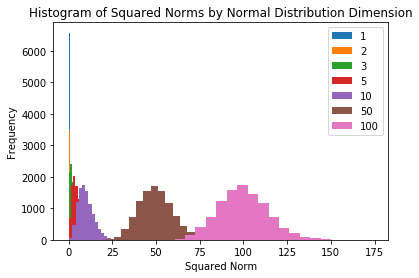

In [56]:
ds = [1,2,3,5,10,50,100]
colors = ["blue","green","yellow","red","orange","black","purple"]
for i in range(len(ds)):
    d = ds[i]
#     print(d)
    mu = np.zeros(d) # mean of distribution
    sigma = np.identity(d) # cov matrix of distribution
    mvGauss = mv_n(mu,sigma)
    x = [np.linalg.norm(x)**2 for x in mvGauss.rvs(10000)]
#     print(x)
#     print("Samples created!")
    
    num_bins = 20
    # the histogram of the data
#     n, bins, patches = plt.hist(x, num_bins,facecolor=colors[i],label=str(d))
    n, bins, patches = plt.hist(x, num_bins,label=str(d))
#     print("Histogram created!\n")
    #     plt.hist(x, num_bins, normed=1, facecolor=colors[i], label=str(d), alpha=0.5)
#     print(d,"complete")
title = "Histogram of Squared Norms by Normal Distribution Dimension"
plt.title(title)
plt.xlabel("Squared Norm")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Downloads/Q2_2/'+title+".png")
plt.show()

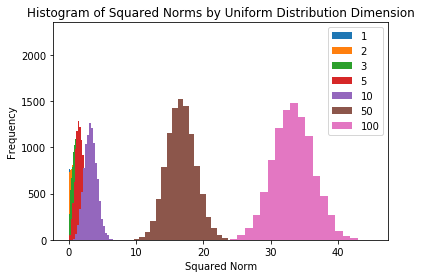

In [58]:
ds = [1,2,3,5,10,50,100]
for d in ds:
    xs=[]
    for i in range(10000):
        x =[]
        for j in range(d):
            x.append(np.random.uniform(-1,1))
        x = np.array(x)
        xs.append(x)
    norms = [np.linalg.norm(x)**2 for x in xs]
    num_bins = 20
    n, bins, patches = plt.hist(norms, num_bins,label=str(d))
    
title = "Histogram of Squared Norms by Uniform Distribution Dimension"
plt.title(title)
plt.xlabel("Squared Norm")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Downloads/Q2_4/'+title+".png")
plt.show()

In [111]:
xs = []
for i in np.arange(-10,10.00001,20.00001/500):
    xs.append(i)

In [268]:
#50000*np.ones(500) - 49999*np.identity(500) # mspd(500)
Sigma = np.identity(500)
# Sigma = 2*np.ones((500,500))
# Sigma += np.diag([0.0001]*500)
print(Sigma)
# Sigma = mspd(500) ** 5

# mu = np.zeros(500)
# mu = 

mu = []
for x in xs:
    mu.append(5*x**2)
mu = np.array(mu)

mvGaussian = mv_n(mu,Sigma)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Mean? g
Covariance? g


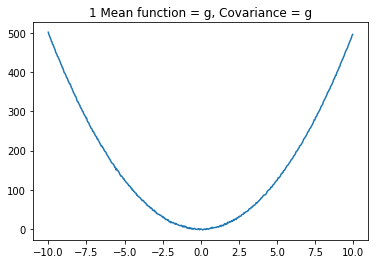

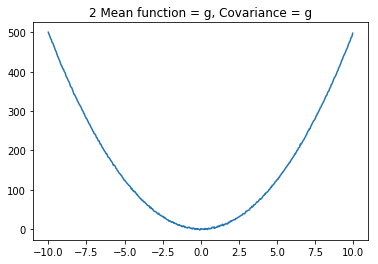

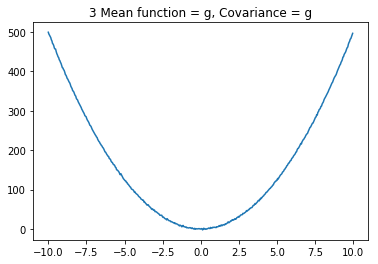

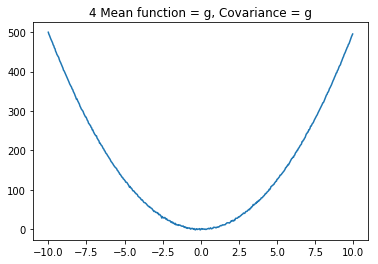

In [270]:
num = 4
fxns = mvGaussian.rvs(num)
if num == 1:
    fxns = [fxns]
mean = input("Mean? ")
covariance = input("Covariance? ")
for i in range(len(fxns)):
    fxn = fxns[i]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(xs,fxn)
    title = str(i+1) +" Mean function = "+ mean+", Covariance = "+covariance 
    plt.title(title)
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
#     plt.savefig('Downloads/Q3_5/'+title+".png")
    plt.show()

In [171]:
positives = 0
negatives = 0
for fxn in fxns:
    print(min(fxn))
#     for i in range(len(fxn)):
#         if fxn[i] > 0:
#             positives += 1
#         else:
#             negatives += 1
#     if positives > negatives:
#         print("More positives, ratio = ", positives / negatives)
#     else:
#         print("More negatives, ratio = ", negatives / positives)

12.157591496320753
-14.872597835189502
-30.737352261384842
-0.5749932454755999


In [83]:
for i in range(5):
    maxValue = 0
    smalls = 0
    larges = 0
    Matrix = mspd(500) ** 5
    for row in Matrix:
        for element in row:
            if element > maxValue:
                maxValue = element
            if element <= 1:
                smalls += 1
            else:
                larges += 1
    print(maxValue)
    print(smalls/(smalls+larges))

408670.8446837706
0.889176
211365.2739553823
0.895864
288687.89494859765
0.889536
40197.774681772855
0.8852
110227.35539401667
0.895744


In [82]:
for i in range(5):
    maxValue = 0
    smalls = 0
    larges = 0
    Matrix = mspd(500)
    for row in Matrix:
        for element in row:
            if element > maxValue:
                maxValue = element
            if element <= 1:
                smalls += 1
            else:
                larges += 1
    print(maxValue)
    print(smalls/(smalls+larges))

8.933175454671375
0.891932
8.135172807630747
0.89508
11.43648485120115
0.892692
12.836622753328415
0.900448
11.885751676091306
0.899788


In [189]:
h = 5
def k(i,j):
    return np.exp((-(xs[i]-xs[j])**2)/h)

In [212]:
h = 1
def k2(i,j):
    return np.exp((-2*(np.sin(np.pi*(xs[i]-xs[j])/3))**2)/h)

In [209]:
K = [[k2(i,j) for i in range(500)] for j in range(500)]
K += np.diag([0.00001]*500)
# print(K)

In [271]:
K = [[k(i,j) for i in range(500)] for j in range(500)]
K += np.diag([0.00001]*500)
# print(K)

Mean? 0
Covariance? K


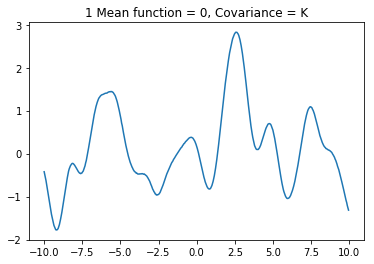

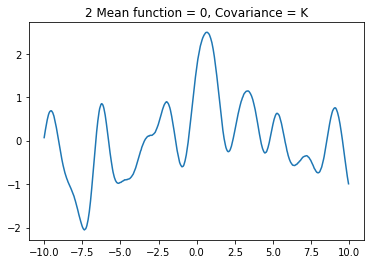

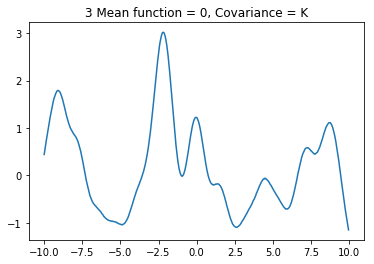

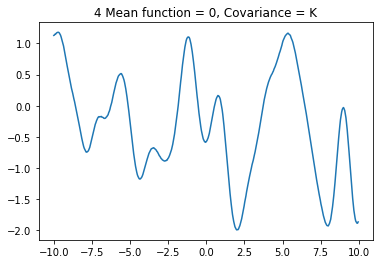

In [272]:
mu = np.zeros(500)
Sigma = K
mvGaussian = mv_n(mu,Sigma)

num = 4
fxns = mvGaussian.rvs(num)
if num == 1:
    fxns = [fxns]
mean = input("Mean? ")
covariance = input("Covariance? ")
for i in range(len(fxns)):
    fxn = fxns[i]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(xs,fxn)
    title = str(i+1) +" Mean function = "+ mean+", Covariance = "+covariance 
    plt.title(title)
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
#     plt.savefig('Downloads/Q3_7/'+title+".png")
    plt.show()

In [274]:
X_bar = [-6,0,7] # len 3
X = xs # len 500
def k3(i,j,X1,X2):
    return np.exp((-(X1[i]-X2[j])**2)/5)

In [275]:
Ks = []
for X1 in [X,X_bar]:
    for X2 in [X,X_bar]:
        K = [[k3(i,j,X1,X2) for j in range(len(X2))] for i in range(len(X1))]
#         K += np.diag([0.00001]*500)
        Ks.append(K)
for K in Ks:
    K2 = np.array(K)
    print(K2.shape)

(500, 500)
(500, 3)
(3, 500)
(3, 3)


In [276]:
Ks2 = []
for K in Ks:
    Ks2.append(np.array(K))
K1 = np.hstack((Ks2[0],Ks2[1]))
K2 = np.hstack((Ks2[2],Ks2[3]))
K3 = np.vstack((K1,K2))
print(K3.shape)
Cov = K3.tolist()
print(len(Cov))
print(len(Cov[1]))

(503, 503)
503
503


In [277]:
mu_n = np.zeros(500)
mu_m = np.zeros(3)
Y_bar = np.array([3,-2,2])
mu = mu_n + np.matmul(np.matmul(np.transpose(Ks2[2]),np.linalg.pinv(Ks2[3])),(Y_bar-mu_m))
print(len(mu))
Sigma = Ks2[0] - np.matmul(np.matmul(np.transpose(Ks2[2]),np.linalg.pinv(Ks2[3])),Ks2[2])
print(Sigma.shape)
Sigma += np.diag([0.001]*500)
mvGaussian = mv_n(mu,Sigma)

500
(500, 500)


Mean? 0
Covariance? K


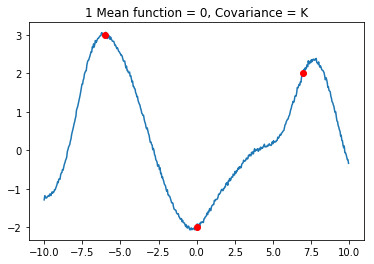

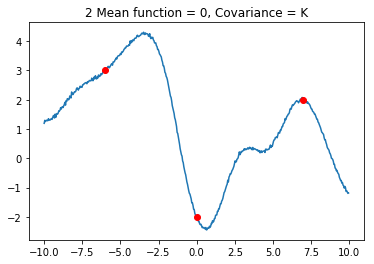

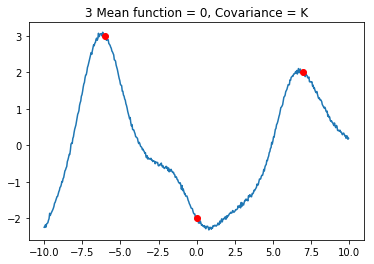

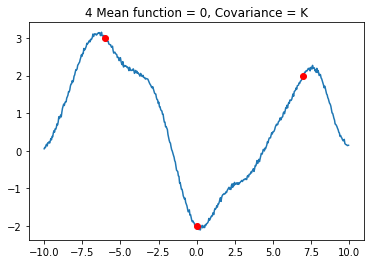

In [278]:
num = 4
fxns = mvGaussian.rvs(num)
if num == 1:
    fxns = [fxns]
mean = input("Mean? ")
covariance = input("Covariance? ")
for i in range(len(fxns)):
    fxn = fxns[i]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(xs,fxn)
    title = str(i+1) +" Mean function = "+ mean+", Covariance = "+covariance 
    plt.title(title)
    plt.plot(X_bar,Y_bar.tolist(),"ro")
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
#     plt.savefig('Downloads/Q3_9/'+title+".png")
    plt.show()

Mean? Mean
Covariance? K


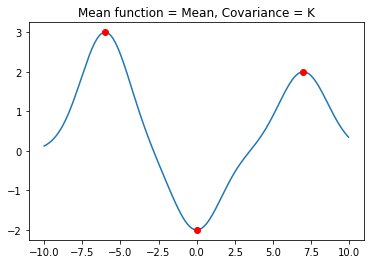

In [284]:
# Plot mean from 3.9 for 3.12
fxn = mu
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(xs,fxn)
mean = input("Mean? ")
covariance = input("Covariance? ")
title = "Mean function = "+ mean+", Covariance = "+covariance 
plt.title(title)
plt.plot(X_bar,Y_bar.tolist(),"ro")
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
plt.savefig('Downloads/Q3_12/'+title+".png")
plt.show()

# 3.10

In [335]:
X_bar = [-6,0,7] # len 3
X = xs # len 500
p = 100
def k4(i,j,X1,X2):
    return np.exp((-2*np.sin(np.pi*(X1[i]-X2[j])/p)**2)/5)

In [336]:
Ks = []
for X1 in [X,X_bar]:
    for X2 in [X,X_bar]:
        K = [[k4(i,j,X1,X2) for j in range(len(X2))] for i in range(len(X1))]
#         K += np.diag([0.00001]*500)
        Ks.append(K)
for K in Ks:
    K2 = np.array(K)
    print(K2.shape)

(500, 500)
(500, 3)
(3, 500)
(3, 3)


In [337]:
Ks2 = []
for K in Ks:
    Ks2.append(np.array(K))
K1 = np.hstack((Ks2[0],Ks2[1]))
K2 = np.hstack((Ks2[2],Ks2[3]))
K3 = np.vstack((K1,K2))
print(K3.shape)
Cov = K3.tolist()
print(len(Cov))
print(len(Cov[1]))

(503, 503)
503
503


In [338]:
mu_n = np.zeros(500)
mu_m = np.zeros(3)
Y_bar = np.array([3,-2,2])
mu = mu_n + np.matmul(np.matmul(np.transpose(Ks2[2]),np.linalg.pinv(Ks2[3])),(Y_bar-mu_m))
print(len(mu))
Sigma = Ks2[0] - np.matmul(np.matmul(np.transpose(Ks2[2]),np.linalg.pinv(Ks2[3])),Ks2[2])
print(Sigma.shape)
Sigma += np.diag([0.001]*500)
mvGaussian = mv_n(mu,Sigma)

500
(500, 500)


Mean? 0
Covariance? K for period 100


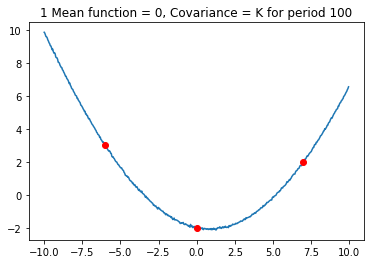

In [339]:
num = 1
fxns = mvGaussian.rvs(num)
if num == 1:
    fxns = [fxns]
mean = input("Mean? ")
covariance = input("Covariance? ")
for i in range(len(fxns)):
    fxn = fxns[i]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(xs,fxn)
    title = str(i+1) +" Mean function = "+ mean+", Covariance = "+covariance 
    plt.title(title)
    plt.plot(X_bar,Y_bar.tolist(),"ro")
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
#     plt.savefig('Downloads/Q3_10/'+title+".png")
    plt.show()

Mean? 0


KeyboardInterrupt: 

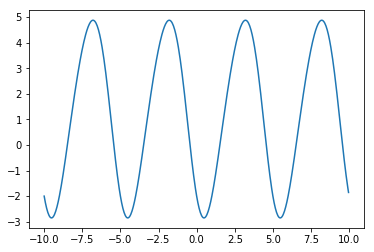

In [334]:
# Plot mean from 3.9 for 3.12
fxn = mu
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(xs,fxn)
mean = input("Mean? ")
covariance = input("Covariance? ")
title = "Mean function = "+ mean+", Covariance = "+covariance 
plt.title(title)
plt.plot(X_bar,Y_bar.tolist(),"ro")
#     plt.ylim([-3, 3])
#     plt.xlim([-10, 10])
plt.savefig('Downloads/Q3_12/'+title+".png")
plt.show()